In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("mymoviedb.csv",lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [13]:
df.duplicated().sum()

0

#### We get the insights that:
- There are no null values and duplicate values.
- The dates coulumn has object data type which should be changed to proper format
- Overview and Poster Url column seems unnecessary, which can be droped.

In [21]:
df['Release_Date'] = pd.to_datetime(df['Release_Date']) #converting datetime format
print(df['Release_Date'].dtypes)

datetime64[ns]


In [23]:
df['Release_Date'] = df['Release_Date'].dt.year    #Extracting only the year
df['Release_Date'].dtypes

dtype('int32')

In [25]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Dropping the unncessary columns

In [30]:
cols = ['Overview','Poster_Url']
df.drop(cols,axis=1,inplace = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


#### Labeling the Vote_average column to make it categorical

In [34]:
def categor_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col],edges,labels = labels,duplicates = 'drop')
    return df

In [38]:
labels = {'not_popular','below_avg','avg','popular'}
categor_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'avg', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'avg' < 'below_avg' < 'popular']

In [40]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,avg,en,Thriller
3,2021,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,below_avg,en,"Action, Adventure, Thriller, War"


In [42]:
df.Vote_Average.value_counts()

Vote_Average
not_popular    2467
popular        2450
below_avg      2412
avg            2398
Name: count, dtype: int64

In [46]:
df.isnull().sum()

Release_Date           0
Title                  0
Popularity             0
Vote_Count             0
Vote_Average         100
Original_Language      0
Genre                  0
dtype: int64

In [48]:
df.dropna(inplace=True)
df.isnull().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64

#### Split the Genre column entries and for every genre let there be new row

In [52]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


##### Changing Genre data type to category

In [55]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  int32   
 1   Title              25552 non-null  object  
 2   Popularity         25552 non-null  float64 
 3   Vote_Count         25552 non-null  int64   
 4   Vote_Average       25552 non-null  category
 5   Original_Language  25552 non-null  object  
 6   Genre              25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(2)
memory usage: 949.2+ KB


Since we splitted the Genre column categories so the number of rows has increased

In [60]:
df.nunique()

Release_Date          100
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
dtype: int64

## Data Visualization

### Which is the most frequent genre of movies released on Netflix?

In [64]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [66]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Genre Distribution')

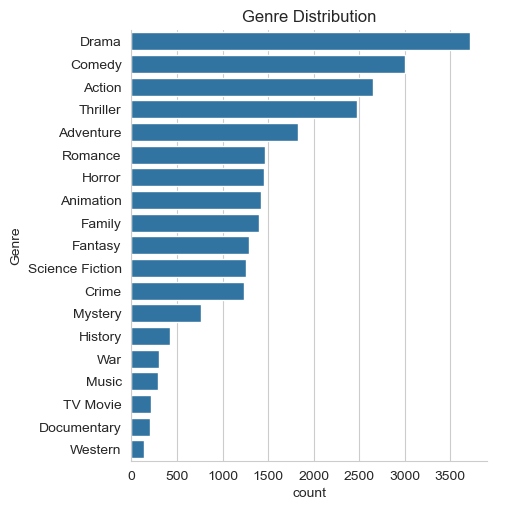

In [68]:
sns.catplot(y = 'Genre',data = df,kind = 'count',order = df['Genre'].value_counts().index)
plt.title('Genre Distribution')

##### So we can say Drama is the most frequent Genre

### Which has the highest votes in Vote Avergae Column?

Text(0.5, 1.0, 'Vote Distribution')

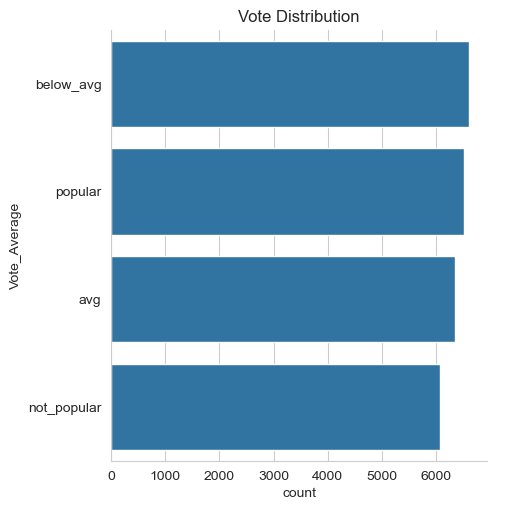

In [72]:
sns.catplot(y = 'Vote_Average',data = df,kind = 'count',order = df['Vote_Average'].value_counts().index)
plt.title('Vote Distribution')

##### Below Average has highest votes

### Which movie got the highest popularity?What is its Genre?

In [78]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction
3,2022,The Batman,3827.658,1151,popular,en,Crime
4,2022,The Batman,3827.658,1151,popular,en,Mystery


In [80]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction


##### Spider-Man movie with Action, Adventure and Science Fiction has the highest popularity

### Which movie got the lowest popularity?What is its Genre?

In [89]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,below_avg,en,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,below_avg,en,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,below_avg,en,History
25549,1984,Threads,13.354,186,popular,en,War
25550,1984,Threads,13.354,186,popular,en,Drama
25551,1984,Threads,13.354,186,popular,en,Science Fiction


##### The United States vs. Billie Holiday movie with Music, Drama and History and Thread movie with War,Drama and Science Fiction has the lowest popularity

### How has the number of Netflix releases changed over the years?

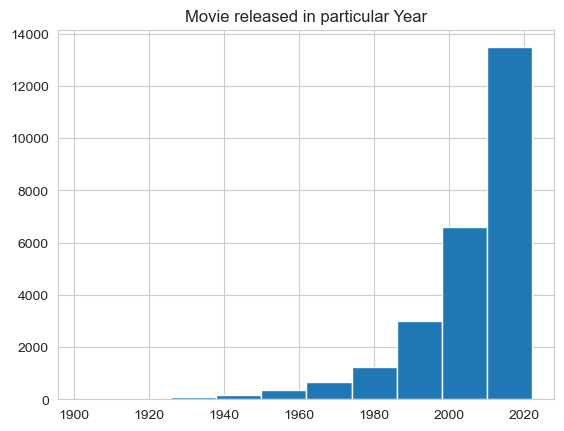

In [94]:
df.Release_Date.hist()
plt.title('Movie released in particular Year')
plt.show()

##### From Year 1920 the release of movies has increased only where we can see that Year 2020 has the most filmmed movies

In [99]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre'],
      dtype='object')

### What are the top 5 original languages used in Netflix content?

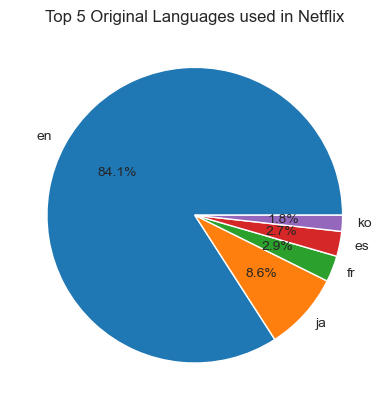

In [109]:
top_languages = df['Original_Language'].value_counts().head(5)
plt.pie(top_languages,labels = top_languages.index, autopct = '%1.1f%%')
plt.title('Top 5 Original Languages used in Netflix')
plt.show()

In [116]:
df['Original_Language'].value_counts().head(5)

Original_Language
en    19844
ja     2018
fr      675
es      643
ko      414
Name: count, dtype: int64

### Which genre-language combinations are most popular?

In [122]:
grouped = df.groupby(['Genre','Original_Language'])['Popularity'].mean().reset_index()
top = grouped.sort_values(by='Popularity',ascending = False)
print(top.head(5))

         Genre Original_Language  Popularity
184      Crime                hi    355.9462
142     Comedy                hi    227.6460
16      Action                hi    174.8778
583    Romance                th    166.8655
66   Adventure                ml    151.5120


C:\Users\Dell\AppData\Local\Temp\ipykernel_26864\2427898676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Genre','Original_Language'])['Popularity'].mean().reset_index()


## Summary

##### Which is the most frequent genre of movies released on Netflix?
Ans: Drama is the most frequent Genre

##### Which has the highest votes in Vote Avergae Column?
Ans: Below Average has highest votes

##### Which movie got the highest popularity?What is its Genre?
Ans: Spider-Man movie with Action, Adventure and Science Fiction has the highest popularity

##### Which movie got the lowest popularity?What is its Genre?
Ans: The United States vs. Billie Holiday movie with Music, Drama and History and Thread movie with War,Drama and Science Fiction has the lowest 
popularity

##### How has the number of Netflix releases changed over the years?
Ans: From Year 1920 the release of movies has increased only where we can see that Year 2020 has the most filmmed movies

##### What are the top 5 original languages used in Netflix content?
Ans: en,ja,fr,es,ko

##### Which genre-language combinations are most popular?
Ans:  Crime genre, hi language, 355.9462 average popularity